## 数据格式：
训练集共891个样本，其中549个未存活、342个存活

|序号|表头名称|表头含义|取值类型|
|--|--|--|--|
|1|PassengerID|旅客id|整数|
|2|Survived|是否存活|0：否； 1：是|
|3|Pclass|舱位|1：头等舱； 2：二等舱； 3：三等舱|
|4|Name|旅客姓名|字符串|
|5|Sex|性别|female；male|
|6|Age|年龄|年龄小于1则为分数；如果是估计年龄，则为xx.5；有缺失值|
|7|SibSp|乘客在船上兄弟姐妹/配偶的个数|整数|
|8|Parch|乘客在船上父母/孩子的个数|整数|
|9|Ticket|票号|字符串|
|10|Fare|票价|浮点数|
|11|Cabin|船舱|字符串；有缺失值|
|12|Embarked|登船港口|C： Cherbourg；Q：Queenstown；S：Southampton；有缺失值|

1. 数值型数据：Age(有缺失值)、SibSp、Parch、Fare
2. 类别型数据：Pclass、Sex、Embarked(有缺失值)
3. ~~文本型数据：Name、Ticket、Cabin(有缺失值)~~

In [94]:
import numpy as np
import pandas as pd
from pylab import mpl

# 指定默认字体：解决plot不能显示中文问题
mpl.rcParams['font.sans-serif'] = ['Microsoft YaHei']
mpl.rcParams['axes.unicode_minus'] = False               # 解决保存图像是负号'-'显示为方块的问题

# 加载数据
data = pd.read_csv('./data/train.csv')
print("数据形状：{}".format(data.shape))
print("列标签：{}".format(data.columns.values))


数据形状：(891, 12)
列标签：['PassengerId' 'Survived' 'Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'Parch'
 'Ticket' 'Fare' 'Cabin' 'Embarked']


## 数据分析：
1. 异常值处理
2. 判断哪些数据和标签值相关性较大
3. 属性之间、属性与结果之间的相关性

In [15]:
# 删除Name、Ticket、Cabin
data = data.drop(columns=['Name', 'Ticket', 'Cabin'])

In [87]:
# 查看 Age 的缺失值情况
age_nan_index = np.where(np.isnan(data['Age']))[0]
age_not_survived = data.loc[data['Survived'] == 0, 'Age']  # 549
age_survived = data.loc[data['Survived'] == 1, 'Age']  # 342

a = age_not_survived[np.isnan(age_not_survived)]  # 125
b = age_not_survived[~np.isnan(age_not_survived)]  # 424
c = age_survived[np.isnan(age_survived)]  # 52
d = age_survived[~np.isnan(age_survived)]  # 290

age = pd.DataFrame([[d.shape[0], c.shape[0]], [b.shape[0], a.shape[0]]], index=[
                    '存活', '未存活'], columns=['非nan', 'nan'])


array([<AxesSubplot:ylabel='非nan'>, <AxesSubplot:ylabel='nan'>],
      dtype=object)

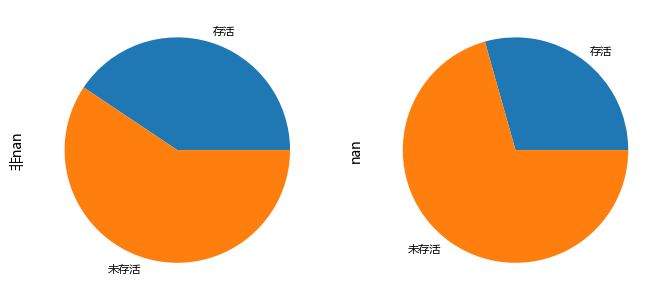

In [103]:
age.plot.pie(subplots=True, figsize=(8, 8), fontsize=8, legend=False)

In [ ]:
# 判断数值型数据与结果之间的相关性
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

plt.subplot(2, 2, 1)
plt.title('不同年龄的获救情况')
x = data.loc[data['Survived'] == 0, 'Age'].value_counts()
y = data.loc[data['Survived'] == 1, 'Age'].value_counts()
index = x.index.sort_values()
plt.bar(index, x[index], linewidth=1, color="orange")
plt.bar(y.index.sort_values(),
        y[y.index.sort_values()], linewidth=1, color="red")
plt.show()

plt.subplot(2, 2, 2)
plt.title('不同年龄的获救情况')
x = data.loc[data['Survived'] == 0, 'SibSp'].value_counts()
y = data.loc[data['Survived'] == 1, 'SibSp'].value_counts()
index = x.index.sort_values()
plt.bar(index, x[index], linewidth=1, color="orange")
plt.bar(y.index.sort_values(),
        y[y.index.sort_values()], linewidth=1, color="red")
plt.show()

plt.subplot(2, 2, 3)
plt.title('不同年龄的获救情况')
x = data.loc[data['Survived'] == 0, 'Parch'].value_counts()
y = data.loc[data['Survived'] == 1, 'Parch'].value_counts()
index = x.index.sort_values()
plt.bar(index, x[index], linewidth=1, color="orange")
plt.bar(y.index.sort_values(),
        y[y.index.sort_values()], linewidth=1, color="red")
plt.show()

plt.subplot(2, 2, 4)
plt.title('不同年龄的获救情况')
x = data.loc[data['Survived'] == 0, 'Fare'].value_counts()
y = data.loc[data['Survived'] == 1, 'Fare'].value_counts()
index = x.index.sort_values()
plt.bar(index, x[index], linewidth=1, color="orange")
plt.bar(y.index.sort_values(),
        y[y.index.sort_values()], linewidth=1, color="red")
plt.show()

In [ ]:
data['Survived'] == 0

In [ ]:
import numpy as np 
import pandas as pd

train_data_dir = '/kaggle/input/titanic/train.csv'
data = pd.read_csv(train_data_dir)
feature_names = list(pd.read_csv(train_data_dir, nrows=0))[2:]
x = data[feature_names]
y = data['Survived']

print(data.shape)
print(x.shape)
print(y.shape)

import numpy as np
import pandas as pd
from sklearn import svm
from sklearn.model_selection import train_test_split


train_data_dir = '/kaggle/input/titanic/train.csv'
data = pd.read_csv(train_data_dir)
feature_names = list(pd.read_csv(train_data_dir, nrows=0))[2:]

x = data[feature_names]
y = data['Survived']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

model = svm.SVC(C=2, kernel='linear', gamma=10)
model.fit(x_train, y_train)
print(model.score(x_train, y_train))